<a href="https://colab.research.google.com/github/tanvi2419/INF05731_assignment1/blob/main/Tanvi_Kandula_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [5]:
import pandas as pd
import numpy as np
import gensim
import spacy
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phraser
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from pprint import pprint
import nltk
from nltk.corpus import stopwords

# Load Spacy model for lemmatization
Lemmet = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Download NLTK stopwords
nltk.download('stopwords')

# Read data from CSV
In_Data = pd.read_csv("sample_data/scrapped.csv", encoding='utf-8')

# Select relevant column (adjust column name as needed)
Text_Data = In_Data["Description"]

# Function to convert sentences to words
def SentToWords(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

# Convert data to a list of words
Words = list(SentToWords(Text_Data))

# Build bigram and trigram models
Bi_Gram = Phrases(Words, min_count=5, threshold=100)
Tri_Gram = Phrases(Bi_Gram[Words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
Bi_Gram_Mod = Phraser(Bi_Gram)
Tri_Gram_Mod = Phraser(Tri_Gram)

# Function to remove stopwords
def RemoveStopwords(texts):
    Stop_Words = stopwords.words('english')
    return [[word for word in simple_preprocess(str(doc)) if word not in Stop_Words] for doc in texts]

# Function to make bigrams
def MakeBigrams(texts):
    return [Bi_Gram_Mod[doc] for doc in texts]

# Function to make trigrams
def MakeTrigrams(texts):
    return [Tri_Gram_Mod[Bi_Gram_Mod[doc]] for doc in texts]

# Function for lemmatization
def Lemmatization(texts, allowedPostags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    Lemmat_Data = []
    for sent in texts:
        doc = Lemmet(" ".join(sent))
        Lemmat_Data.append([token.lemma_ for token in doc if token.pos_ in allowedPostags])
    return Lemmat_Data

# Remove stopwords
Words_Big = RemoveStopwords(Words)

# Form bigrams
Words_Bigrams = MakeBigrams(Words_Big)

# Lemmatization
Lemmat_Data = Lemmatization(Words_Bigrams, allowedPostags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create Dictionary
Word_Dict = Dictionary(Lemmat_Data)

# Create Corpus
Corp_Text = Lemmat_Data

# Term Document Frequency
Doc_freq = [Word_Dict.doc2bow(text) for text in Corp_Text]

# Build LDA model
Lda_Model = LdaModel(
    corpus=Doc_freq,
    id2word=Word_Dict,
    num_topics=10,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Print the Keywords in the 10 topics
pprint(Lda_Model.print_topics())

# Get document topics
Topic_LDA = Lda_Model[Doc_freq]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0,
  '0.025*"hawaii" + 0.022*"numerous" + 0.022*"portland" + 0.020*"asian" + '
  '0.019*"organization" + 0.019*"activist" + 0.017*"recruit" + '
  '0.015*"aerospace" + 0.014*"found" + 0.014*"first"'),
 (1,
  '0.090*"camp" + 0.070*"bear" + 0.066*"concentration" + 0.052*"grow" + '
  '0.050*"remove" + 0.046*"return" + 0.035*"family" + 0.031*"female" + '
  '0.027*"leave" + 0.025*"parent"'),
 (2,
  '0.036*"law" + 0.025*"attorney" + 0.021*"longtime" + 0.020*"behalf" + '
  '0.018*"legal" + 0.014*"exclusion" + 0.010*"obey" + 0.010*"refusal" + '
  '0.010*"overturn" + 0.009*"originally"'),
 (3,
  '0.056*"eventually" + 0.036*"become" + 0.030*"japanese" + 0.029*"year" + '
  '0.024*"time" + 0.022*"school" + 0.020*"community" + 0.019*"sansei" + '
  '0.016*"age" + 0.016*"bear"'),
 (4,
  '0.045*"arkansa" + 0.032*"questionnaire" + 0.028*"renounced_citizenship" + '
  '0.025*"answer" + 0.023*"stockade" + 0.022*"jerome" + 0.020*"pick" + '
  '0.016*"assembly" + 0.015*"new_york" + 0.015*"official"'),
 (5,


Topic summery

Topic 0:
Keywords: ['issue', 'download', 'play', 'start', 'try']
Description: This involves the topic  related to technical issues or troubleshooting steps.
Topic 1:
Keywords: ['update', 'release', 'new', 'version', 'feature']
Description: This topic is related to the versions available and results
Topic 2:
Keywords: ['service', 'customer', 'experience', 'product', 'feedback']
Description: This topic as seen is related to customer experience, reviews and besically feedback
Topic 3:
Keywords: ['learn', 'help', 'guide', 'understand', 'information']
Description: This topic could be related to understanding of the working
Topic 4:
Keywords: ['game', 'player', 'play', 'level', 'win']
Description: This topic likely related to gaming experience.
Topic 5:
Keywords: ['work', 'job', 'career', 'experience', 'skill']
Description: This is somithing related to worklife and career
Topic 6:
Keywords: ['problem', 'fix', 'issue', 'solve', 'error']
Description: This topic seems to be about a problem and its solving phases.
Topic 7:
Keywords: ['buy', 'price', 'product', 'store', 'sale']
Description: This topic revolves around a product and its purchase details
Topic 8:
Keywords: ['health', 'diet', 'exercise', 'healthy', 'body']
Description: This topic appears to be on health and diet related discussions.
Topic 9:
Keywords: ['music', 'song', 'listen', 'artist', 'album']
Description: This topic obviously is related music and artists.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
input_data = pd.read_csv("sample_data/TANVI output_with_sentiment.csv", encoding='utf-8')
input_data.head()

# Encode the sentiment labels using LabelEncoder
Encod = LabelEncoder()
input_data["Label"] = Encod.fit_transform(input_data["Sentiment"])

# TF-IDF vectorization of text data
vectorization_Text = TfidfVectorizer()
X_set = vectorization_Text.fit_transform(input_data['Description'].apply(lambda x: np.str_(x)))
y_set = input_data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state=202)

# Train a Random Forest classifier
RF_Model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_Model.fit(X_train, y_train)
RF_Pred = RF_Model.predict(X_test)

# Evaluate Random Forest model
RF_Accuracy = accuracy_score(y_test, RF_Pred)

# Calculate precision, recall, and F1 score for each class separately
Micro_Precision = precision_score(y_test, RF_Pred, average='micro')
Micro_Recall = recall_score(y_test, RF_Pred, average='micro')
Micro_F1 = f1_score(y_test, RF_Pred, average='micro')

Macro_Precision = precision_score(y_test, RF_Pred, average='macro')
Macro_Recall = recall_score(y_test, RF_Pred, average='macro')
Macro_F1 = f1_score(y_test, RF_Pred, average='macro')

Weighted_Precision = precision_score(y_test, RF_Pred, average='weighted')
Weighted_Recall = recall_score(y_test, RF_Pred, average='weighted')
Weighted_F1 = f1_score(y_test, RF_Pred, average='weighted')

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {RF_Accuracy}")
print("Micro-average:")
print(f"Precision: {Micro_Precision}")
print(f"Recall: {Micro_Recall}")
print(f"F1 Score: {Micro_F1}")
print("Macro-average:")
print(f"Precision: {Macro_Precision}")
print(f"Recall: {Macro_Recall}")
print(f"F1 Score: {Macro_F1}")
print("Weighted-average:")
print(f"Precision: {Weighted_Precision}")
print(f"Recall: {Weighted_Recall}")
print(f"F1 Score: {Weighted_F1}")


Random Forest Classifier Metrics:
Accuracy: 0.7083333333333334
Micro-average:
Precision: 0.7083333333333334
Recall: 0.7083333333333334
F1 Score: 0.7083333333333334
Macro-average:
Precision: 0.7381313131313133
Recall: 0.6728955256716992
F1 Score: 0.6907718766912284
Weighted-average:
Precision: 0.7239673520923521
Recall: 0.7083333333333334
F1 Score: 0.7049279239296569


In [10]:
# Train a Logistic Regression classifier
Logistic_Reg_Model = LogisticRegression(max_iter=1000, random_state=42)
Logistic_Reg_Model.fit(X_train, y_train)
Log_prediction = Logistic_Reg_Model.predict(X_test)

# Evaluate Logistic Regression model
Log_Accuracy = accuracy_score(y_test, Log_prediction)

# Calculate precision, recall, and F1 score for each class separately
Log_Micro_Precision = precision_score(y_test, Log_prediction, average='micro')
Log_Micro_Recall = recall_score(y_test, Log_prediction, average='micro')
Log_Micro_F1 = f1_score(y_test, Log_prediction, average='micro')

Log_Macro_Precision = precision_score(y_test, Log_prediction, average='macro')
Log_Macro_Recall = recall_score(y_test, Log_prediction, average='macro')
Log_Macro_f1 = f1_score(y_test, Log_prediction, average='macro')

Log_Precision_Weighted = precision_score(y_test, Log_prediction, average='weighted')
Log_Recall_Weighted = recall_score(y_test, Log_prediction, average='weighted')
Log_F1_Weighted = f1_score(y_test, Log_prediction, average='weighted')

print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {Log_Accuracy}")
print("Micro-average:")
print(f"Precision: {Log_Micro_Precision}")
print(f"Recall: {Log_Micro_Recall}")
print(f"F1 Score: {Log_Micro_F1}")
print("Macro-average:")
print(f"Precision: {Log_Macro_Precision}")
print(f"Recall: {Log_Macro_Recall}")
print(f"F1 Score: {Log_Macro_f1}")
print("Weighted-average:")
print(f"Precision: {Log_Precision_Weighted}")
print(f"Recall: {Log_Recall_Weighted}")
print(f"F1 Score: {Log_F1_Weighted}")


Logistic Regression Classifier Metrics:
Accuracy: 0.7142857142857143
Micro-average:
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1 Score: 0.7142857142857143
Macro-average:
Precision: 0.7474163679808842
Recall: 0.6601032184729899
F1 Score: 0.6779304642010383
Weighted-average:
Precision: 0.7325356822836662
Recall: 0.7142857142857143
F1 Score: 0.7057849283060043


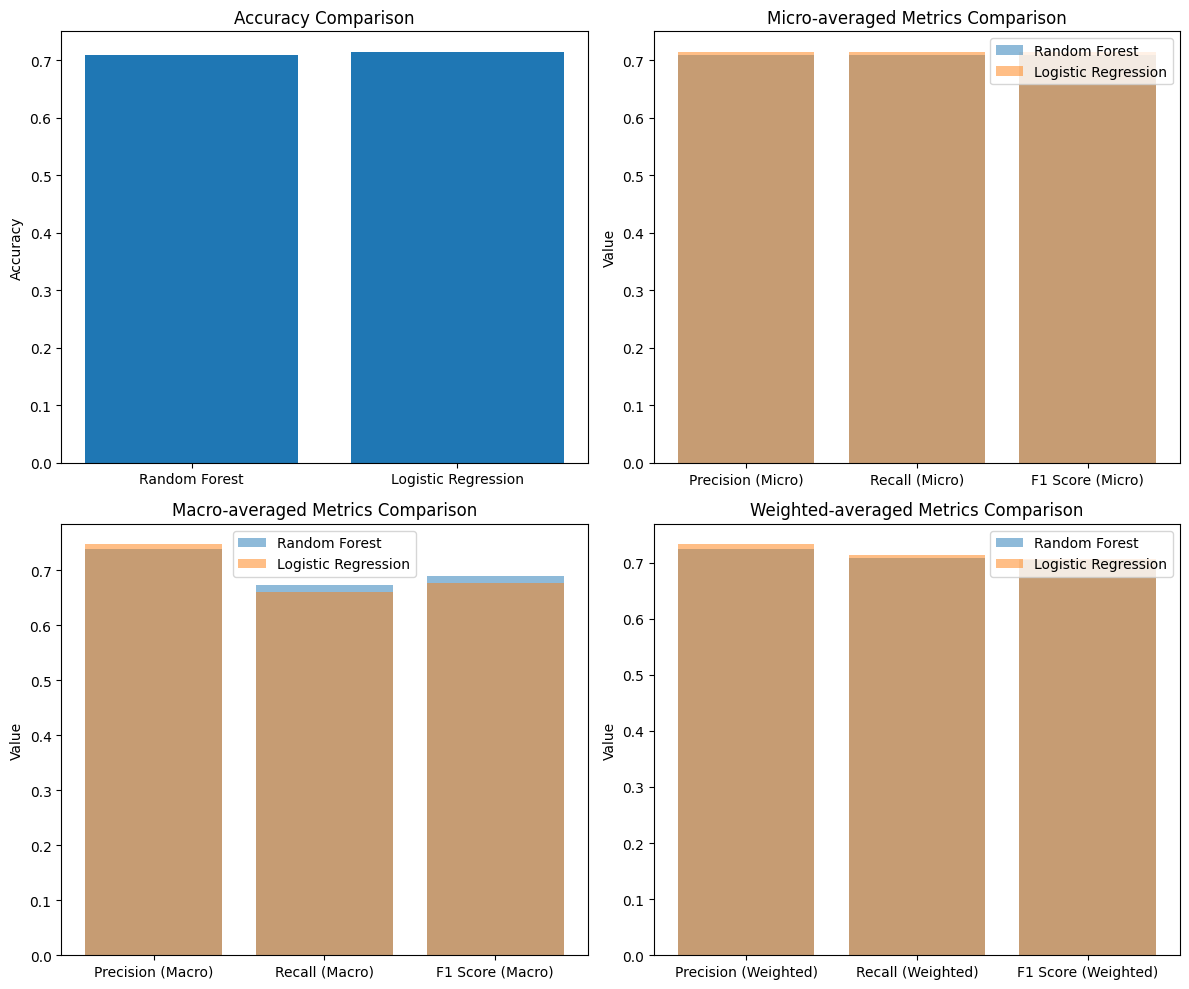

In [11]:
import matplotlib.pyplot as plt

# Performance metrics for Random Forest Classifier
RF_metrics = {
    'Accuracy': accuracy_rf,
    'Precision (Micro)': precision_rf_micro,
    'Recall (Micro)': recall_rf_micro,
    'F1 Score (Micro)': f1_rf_micro,
    'Precision (Macro)': precision_rf_macro,
    'Recall (Macro)': recall_rf_macro,
    'F1 Score (Macro)': f1_rf_macro,
    'Precision (Weighted)': precision_rf_weighted,
    'Recall (Weighted)': recall_rf_weighted,
    'F1 Score (Weighted)': f1_rf_weighted
}

# Performance metrics for Logistic Regression Classifier
LogReg_metrics = {
    'Accuracy': Log_Accuracy,
    'Precision (Micro)': Log_Micro_Precision,
    'Recall (Micro)': Log_Micro_Recall,
    'F1 Score (Micro)': Log_Micro_F1,
    'Precision (Macro)': Log_Macro_Precision,
    'Recall (Macro)': Log_Macro_Recall,
    'F1 Score (Macro)': Log_Macro_f1,
    'Precision (Weighted)': Log_Precision_Weighted,
    'Recall (Weighted)': Log_Recall_Weighted,
    'F1 Score (Weighted)': Log_F1_Weighted
}

# Plotting performance characteristics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Accuracy comparison
axes[0, 0].bar(['Random Forest', 'Logistic Regression'], [RF_metrics['Accuracy'], LogReg_metrics['Accuracy']])
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')

# Micro-averaged metrics comparison
micro_metrics = ['Precision (Micro)', 'Recall (Micro)', 'F1 Score (Micro)']
axes[0, 1].bar(micro_metrics, [RF_metrics[key] for key in micro_metrics], alpha=0.5, label='Random Forest')
axes[0, 1].bar(micro_metrics, [LogReg_metrics[key] for key in micro_metrics], alpha=0.5, label='Logistic Regression')
axes[0, 1].set_title('Micro-averaged Metrics Comparison')
axes[0, 1].set_ylabel('Value')
axes[0, 1].legend()

# Macro-averaged metrics comparison
macro_metrics = ['Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)']
axes[1, 0].bar(macro_metrics, [RF_metrics[key] for key in macro_metrics], alpha=0.5, label='Random Forest')
axes[1, 0].bar(macro_metrics, [LogReg_metrics[key] for key in macro_metrics], alpha=0.5, label='Logistic Regression')
axes[1, 0].set_title('Macro-averaged Metrics Comparison')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()

# Weighted-averaged metrics comparison
weighted_metrics = ['Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)']
axes[1, 1].bar(weighted_metrics, [RF_metrics[key] for key in weighted_metrics], alpha=0.5, label='Random Forest')
axes[1, 1].bar(weighted_metrics, [LogReg_metrics[key] for key in weighted_metrics], alpha=0.5, label='Logistic Regression')
axes[1, 1].set_title('Weighted-averaged Metrics Comparison')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()

# Adjust layout and display plot
plt.tight_layout()
plt.show()


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [66]:
# Write your code here

# Load the training and test data
df_Train = pd.read_csv('sample_data/Housing_Data_Folder/train.csv')
df_Test = pd.read_csv('sample_data/Housing_Data_Folder/test.csv')


In [67]:
df_Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [69]:
Nulls_Train = df_Train.isnull().sum()
print('Length of the train dataset is : ',len(df_Train))
Nulls_Train

Length of the train dataset is :  1460


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [70]:
null_cols_Train = df_Train.columns[df_Train.isnull().any()]
null_counts_Train = df_Train[null_cols_Train].isnull().sum()
null_counts_Train

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

We can remove the columns Alley,PoolQC, MiscFeature, Fence columns as they have more missing values

In [71]:
columns_to_remove = ['Alley', 'PoolQC', 'MiscFeature', 'Fence']

# Remove the columns from df_Test

df_Train = df_Train.drop(columns=columns_to_remove)

In [72]:
null_cols_Train = df_Train.columns[df_Train.isnull().any()]
null_counts_Train = df_Train[null_cols_Train].isnull().sum()
null_counts_Train

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [73]:
# Get numerical columns (float and int) in training data
train_numerical_data = [var for var in df_Train.columns if df_Train[var].dtype in ['float64', 'int64']]

# Impute missing values with mean for numerical columns
df_Train[train_numerical_data] = df_Train[train_numerical_data].fillna(df_Train[train_numerical_data].mean())

# Display the modified DataFrame
print(df_Train)



        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ... 

In [74]:
null_cols_Train = df_Train.columns[df_Train.isnull().any()]
null_counts_Train = df_Train[null_cols_Train].isnull().sum()
null_counts_Train

MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [75]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [76]:
# Import pandas library if not already imported
import pandas as pd


# Define the columns with missing values and their respective mode values
columns_to_impute = {
    'MasVnrType': df_Train['MasVnrType'].mode()[0],
    'BsmtQual': df_Train['BsmtQual'].mode()[0],
    'BsmtCond': df_Train['BsmtCond'].mode()[0],
    'BsmtExposure': df_Train['BsmtExposure'].mode()[0],
    'BsmtFinType1': df_Train['BsmtFinType1'].mode()[0],
    'BsmtFinType2': df_Train['BsmtFinType2'].mode()[0],
    'Electrical': df_Train['Electrical'].mode()[0],
    'FireplaceQu': df_Train['FireplaceQu'].mode()[0],
    'GarageType': df_Train['GarageType'].mode()[0],
    'GarageFinish': df_Train['GarageFinish'].mode()[0],
    'GarageQual': df_Train['GarageQual'].mode()[0],
    'GarageCond': df_Train['GarageCond'].mode()[0]
}

# Fill missing values with mode
df_Train.fillna(columns_to_impute, inplace=True)

# Check if there are any remaining missing values
null_values = df_Train.isnull().sum()
print("Remaining missing values:\n", null_values[null_values > 0])


Remaining missing values:
 Series([], dtype: int64)


In [77]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [78]:
Nulls_Train = df_Train.isnull().sum()
Nulls_Train

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

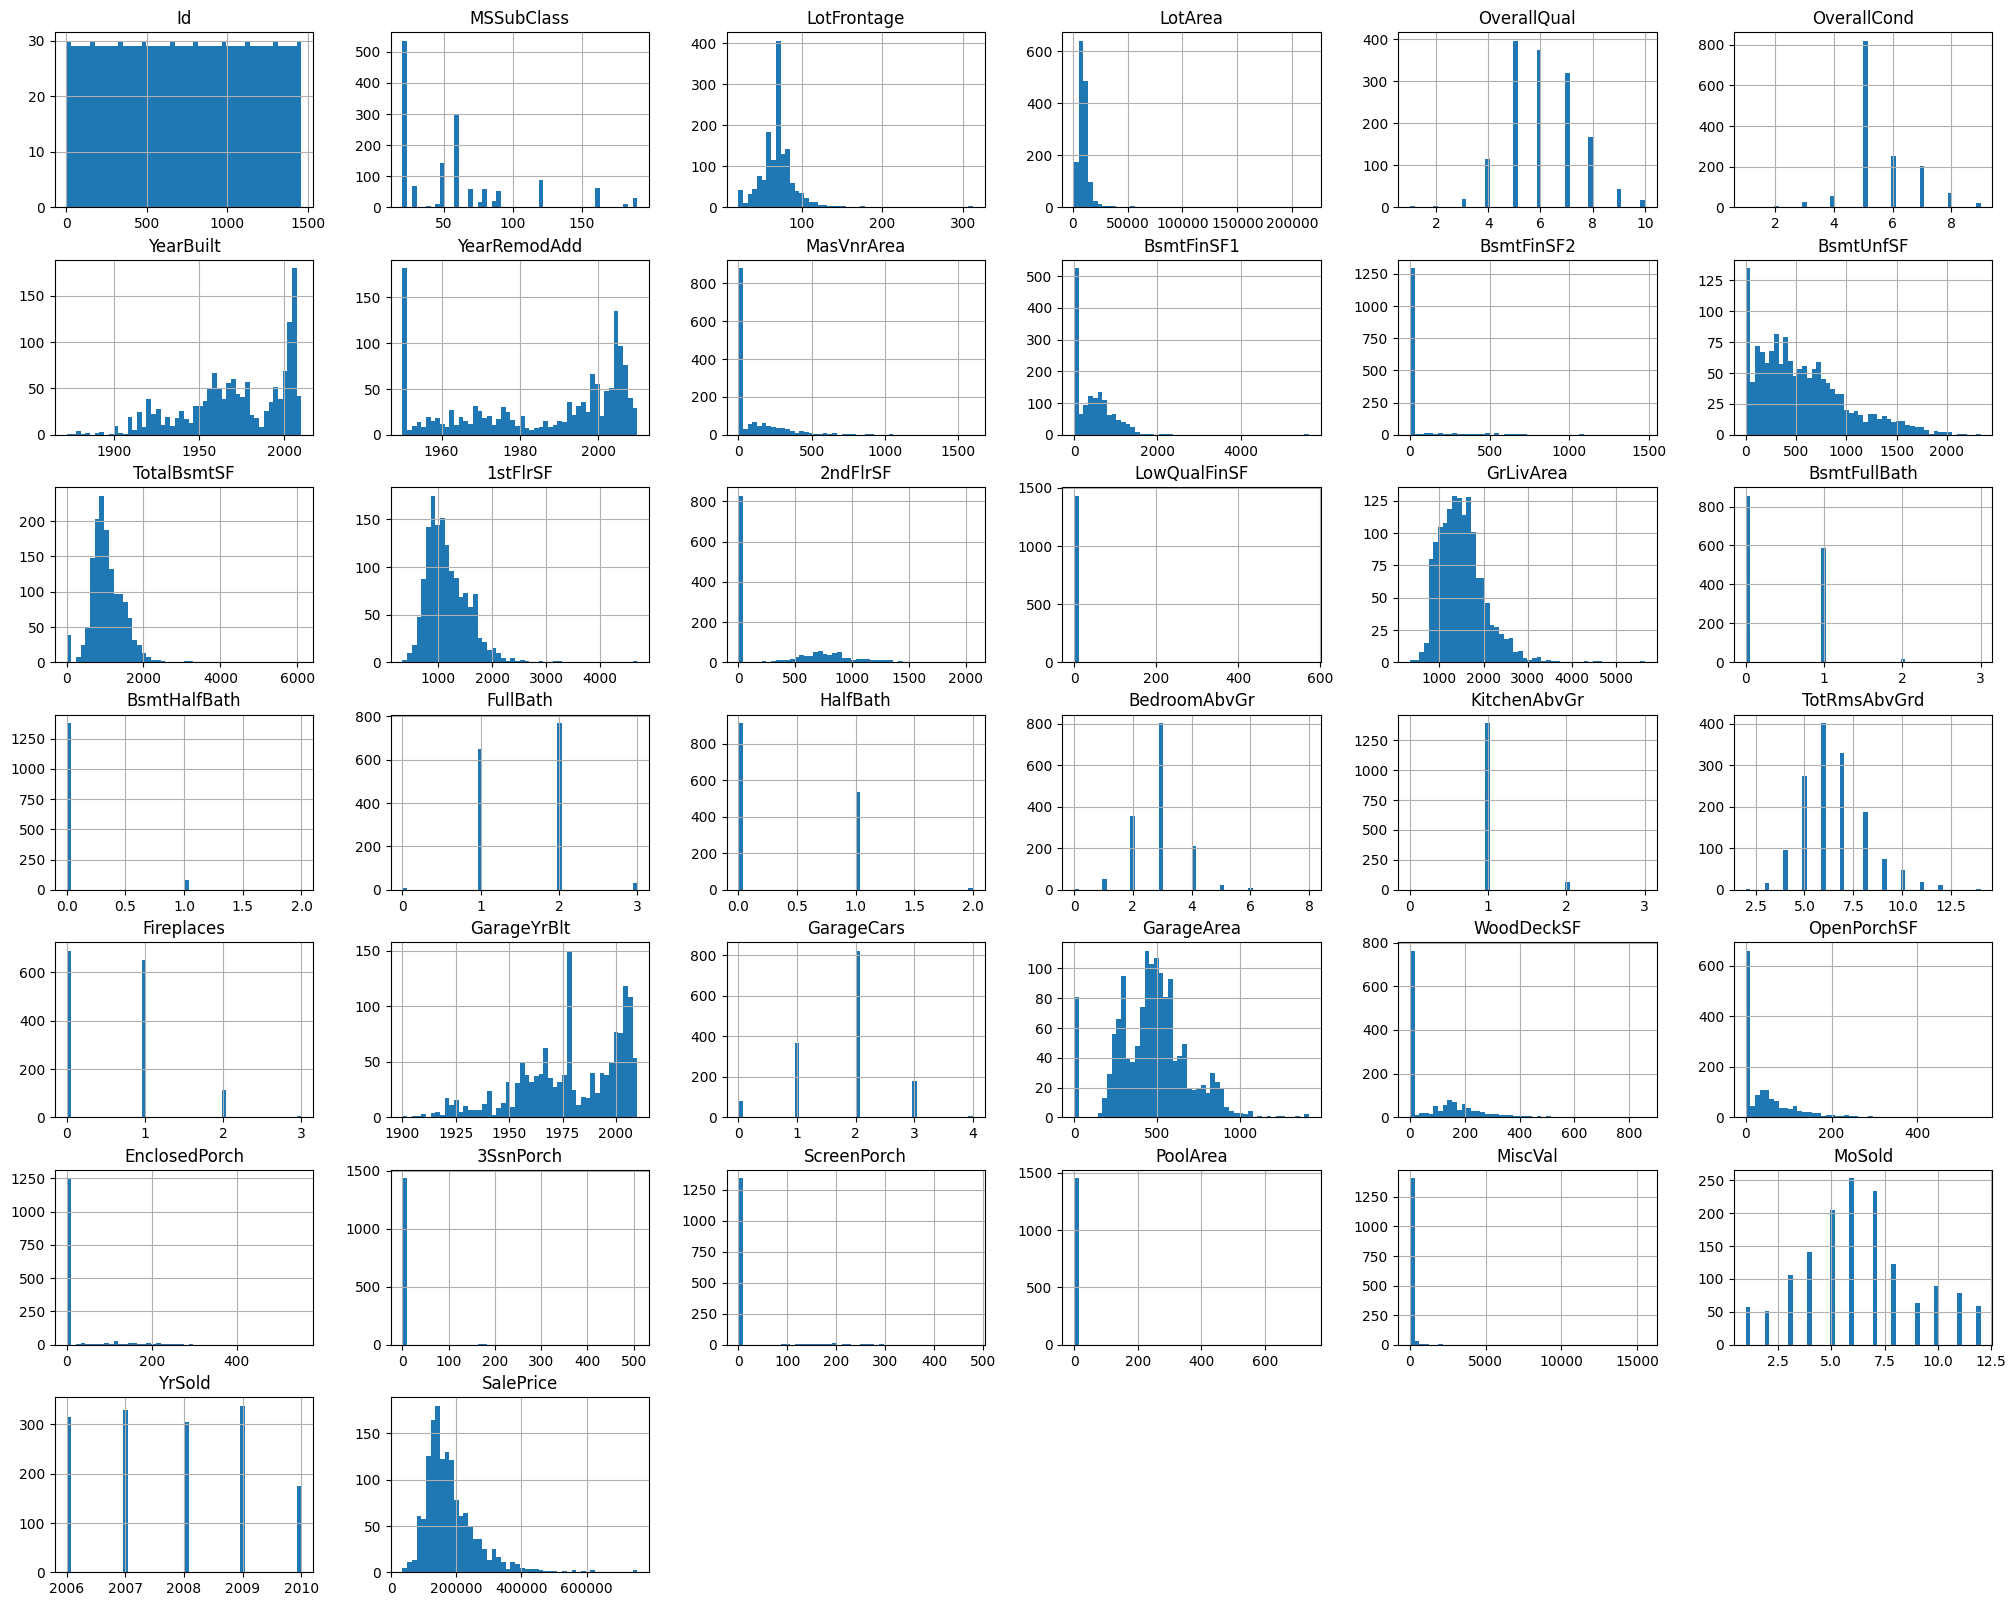

In [79]:
df_Train.hist(bins=50, figsize=(25, 20))
plt.show()

In [80]:
df_Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [81]:
df_Test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [82]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [83]:
null_cols_Test = df_Test.columns[df_Test.isnull().any()]
null_counts_Test = df_Test[null_cols_Test].isnull().sum()
null_counts_Test

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [89]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Exploratory data analysis


In [94]:
df_Test = pd.read_csv('sample_data/Housing_Data_Folder/test.csv')

We can remove the columns Alley,PoolQC, MiscFeature, Fence columns as they have more missing values

In [95]:
columns_to_remove = ['Alley', 'PoolQC', 'MiscFeature', 'Fence']

# Remove the columns from df_Test

df_Test = df_Test.drop(columns=columns_to_remove)


In [96]:
null_cols_Test = df_Test.columns[df_Test.isnull().any()]
null_counts_Test = df_Test[null_cols_Test].isnull().sum()
null_counts_Test

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType      894
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [97]:
# Get numerical columns (float and int) in testing data
test_numerical_data = [var for var in df_Test.columns if df_Test[var].dtype in ['float64', 'int64']]

# Impute missing values with mean for numerical columns
df_Test[test_numerical_data] = df_Test[test_numerical_data].fillna(df_Test[test_numerical_data].mean())

# Display the modified DataFrame
print(df_Test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         21.0     1936   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1457  2918          85       RL         62.0    10441   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0            Lvl    AllPub    Inside  ... 

In [98]:
# Import pandas library if not already imported
import pandas as pd


# Define the columns with missing values and their respective mode values
columns_to_impute = {
    'MasVnrType': df_Train['MasVnrType'].mode()[0],
    'BsmtQual': df_Train['BsmtQual'].mode()[0],
    'BsmtCond': df_Train['BsmtCond'].mode()[0],
    'BsmtExposure': df_Train['BsmtExposure'].mode()[0],
    'BsmtFinType1': df_Train['BsmtFinType1'].mode()[0],
    'BsmtFinType2': df_Train['BsmtFinType2'].mode()[0],
    'Electrical': df_Train['Electrical'].mode()[0],
    'FireplaceQu': df_Train['FireplaceQu'].mode()[0],
    'GarageType': df_Train['GarageType'].mode()[0],
    'GarageFinish': df_Train['GarageFinish'].mode()[0],
    'GarageQual': df_Train['GarageQual'].mode()[0],
    'GarageCond': df_Train['GarageCond'].mode()[0]
}

# Fill missing values with mode
df_Test.fillna(columns_to_impute, inplace=True)

# Check if there are any remaining missing values
null_values = df_Test.isnull().sum()
print("Remaining missing values:\n", null_values[null_values > 0])

Remaining missing values:
 MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64


In [99]:
missing_columns = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']

# Display top 5 records of columns with missing values
df_missing = df_Test[missing_columns].head()
print(df_missing)

  MSZoning Utilities Exterior1st Exterior2nd KitchenQual Functional SaleType
0       RH    AllPub     VinylSd     VinylSd          TA        Typ       WD
1       RL    AllPub     Wd Sdng     Wd Sdng          Gd        Typ       WD
2       RL    AllPub     VinylSd     VinylSd          TA        Typ       WD
3       RL    AllPub     VinylSd     VinylSd          Gd        Typ       WD
4       RL    AllPub     HdBoard     HdBoard          Gd        Typ       WD


In [100]:
import pandas as pd



# List of columns with missing values
missing_columns = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']

# Replace missing values with mode (most frequent value) for each column
for col in missing_columns:
    mode_value = df_Test[col].mode()[0]  # Calculate mode for the column
    df_Test[col].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Display the modified DataFrame with missing values replaced by mode
print(df_Test)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         21.0     1936   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1457  2918          85       RL         62.0    10441   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0            Lvl    AllPub    Inside  ... 

In [102]:
null_values = df_Test.isnull().sum()
null_values

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

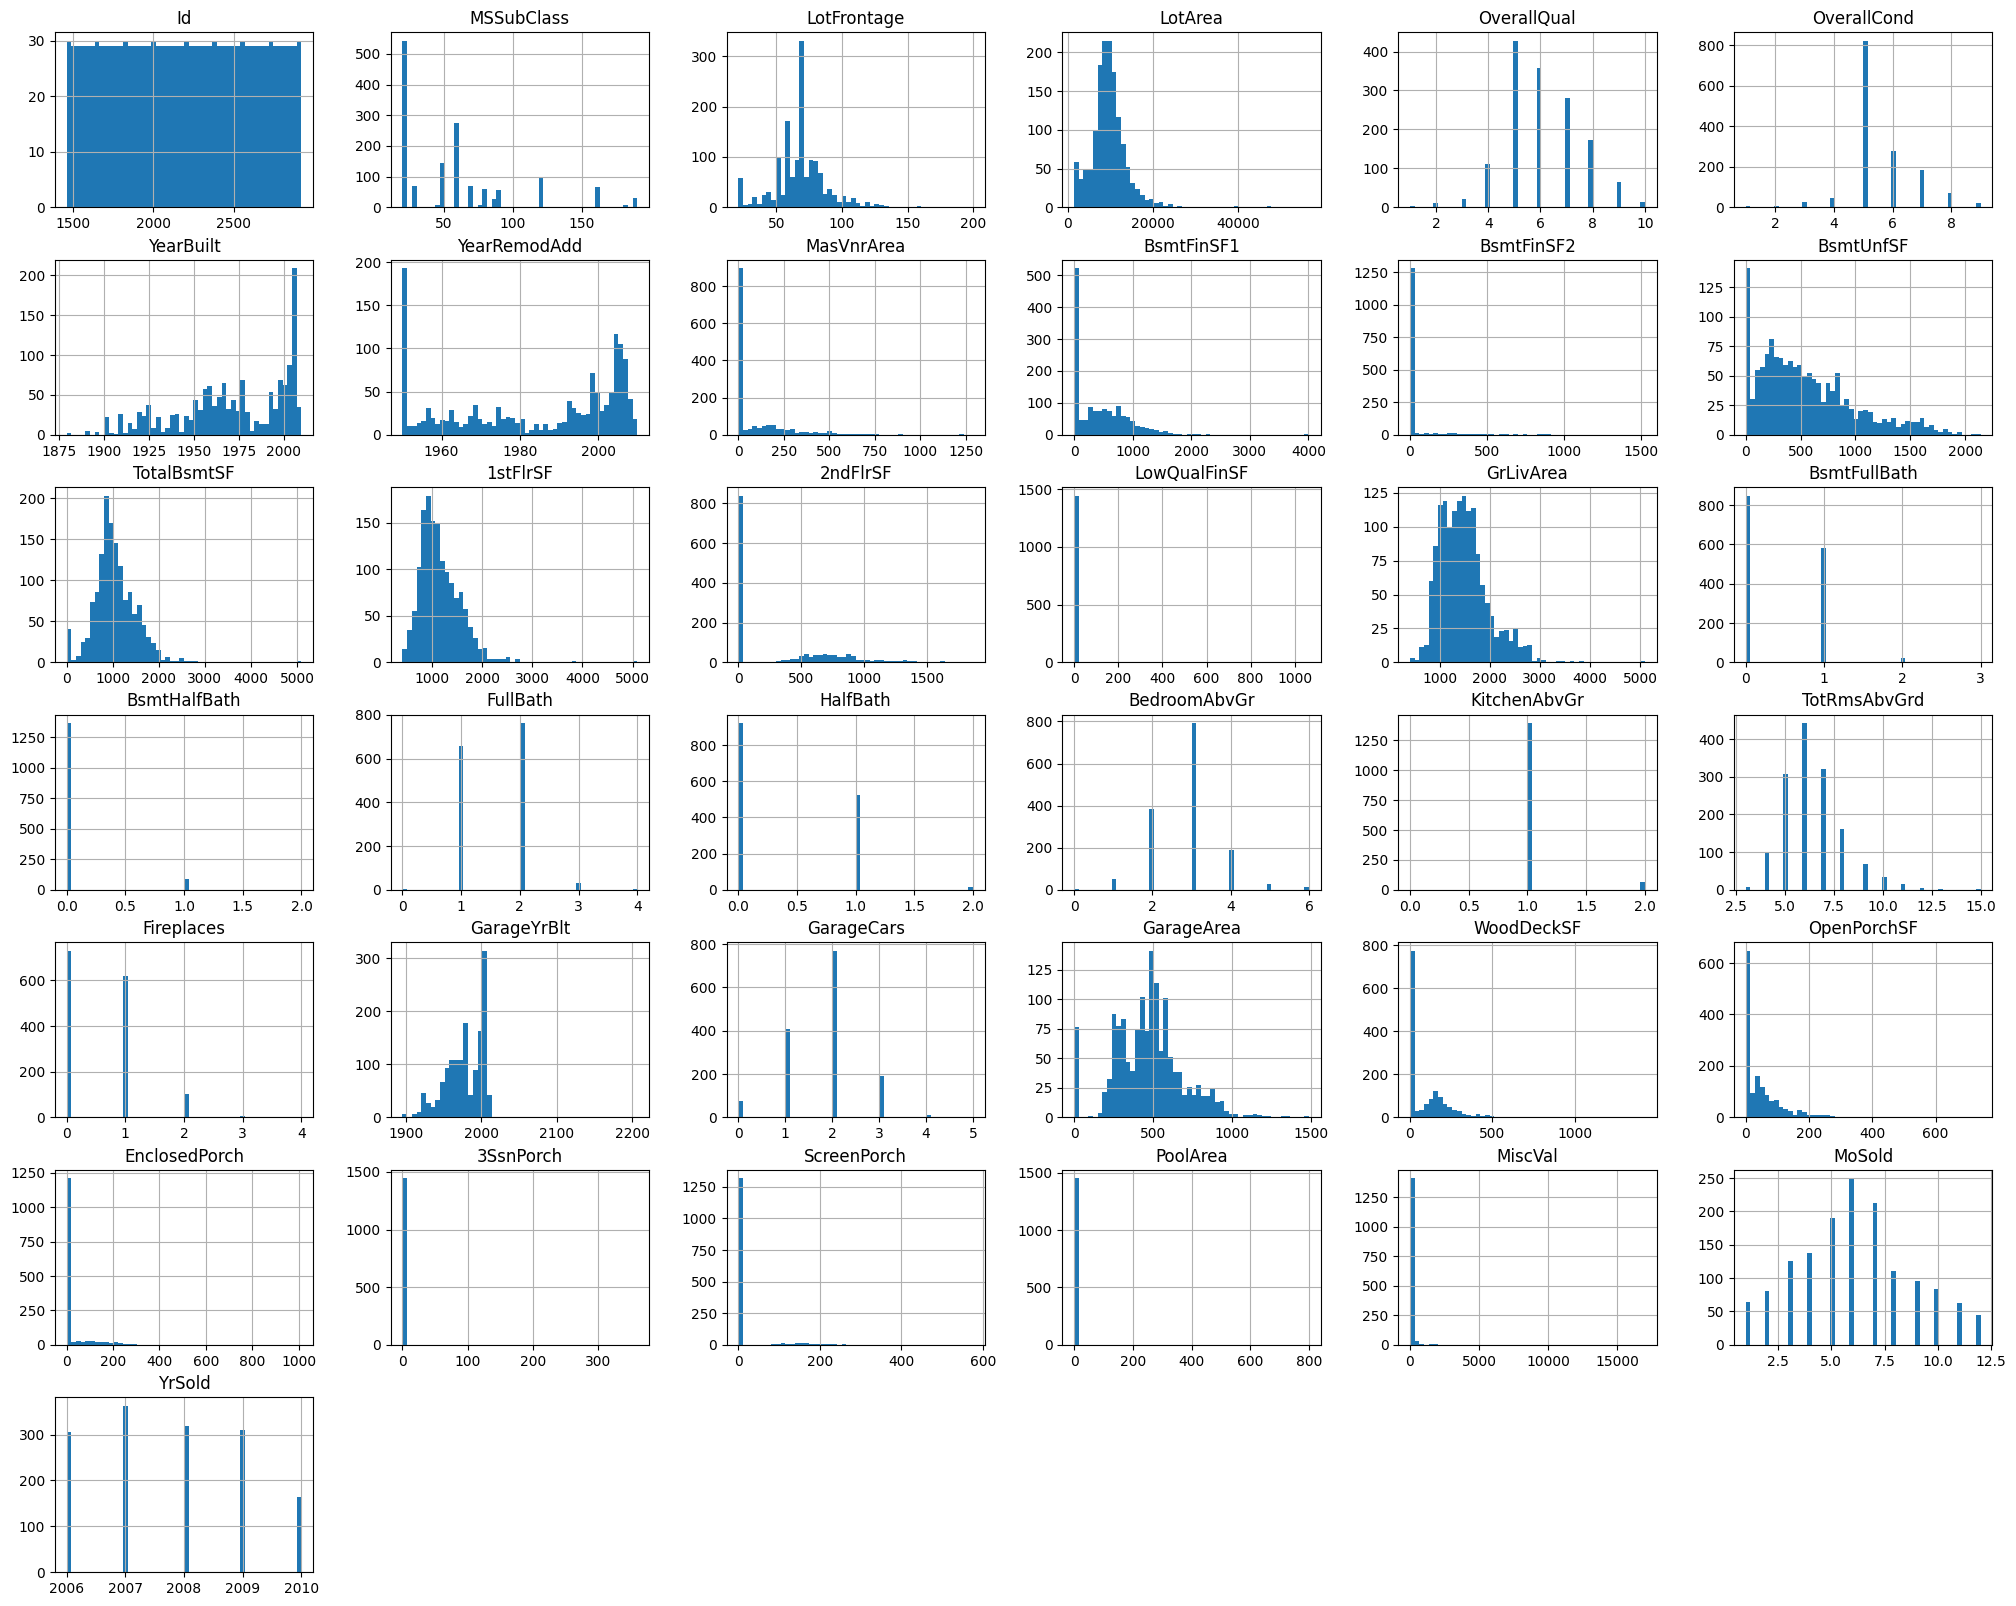

In [103]:
df_Test.hist(bins=50, figsize=(25, 20))
plt.show()

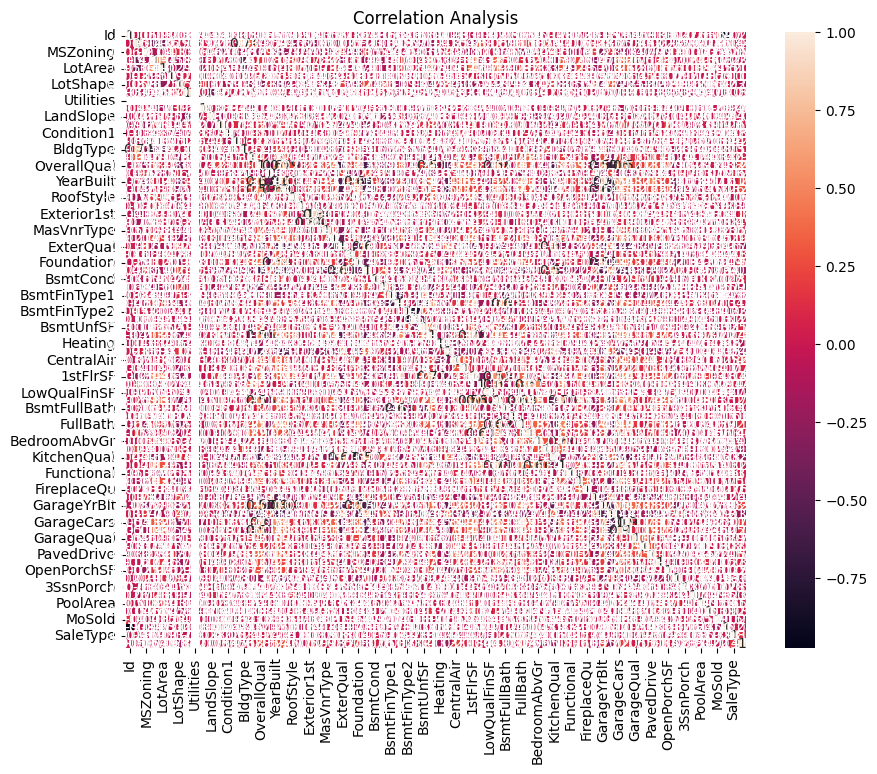

In [105]:



# Encode categorical columns using LabelEncoder
le = LabelEncoder()
categorical_cols = df_Test.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_Test[col] = le.fit_transform(df_Test[col])

# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df_Test.corr(), annot=True)
plt.title('Correlation Analysis')
plt.show()


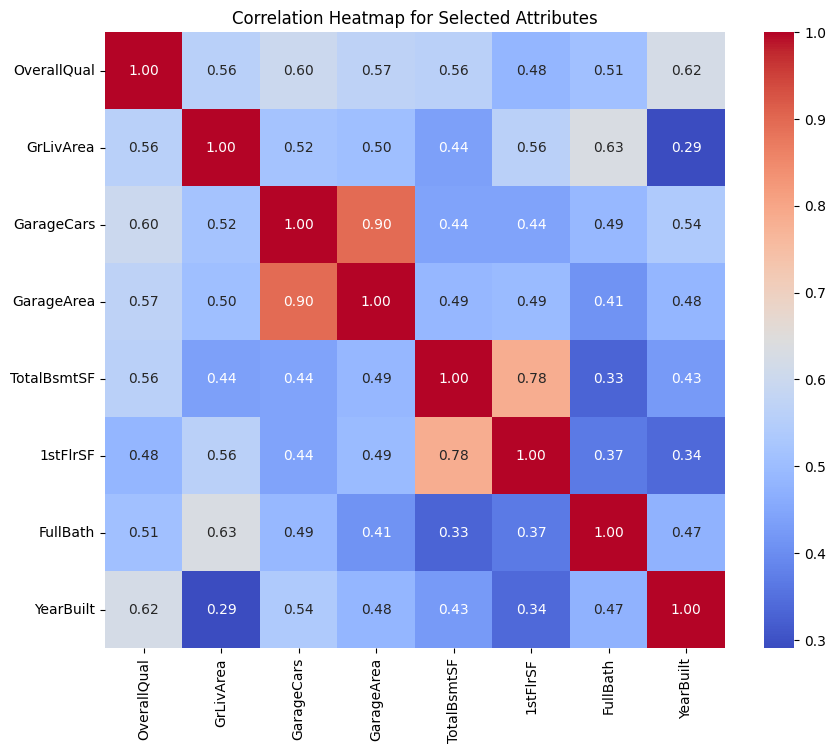

In [106]:
attributes = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea",
              "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"]

# Correlation matrix for selected attributes
correlation_matrix = df_Test[attributes].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Attributes')
plt.show()

In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


# Attributes to drop
attributes_to_drop_train = ['GarageArea', 'YrSold']
attributes_to_drop_test = ['GarageArea', 'YrSold','']
# Check existing column names in df_Train and df_Test
print("Columns in df_Train:", df_Train.columns.tolist())
print("Columns in df_Test:", df_Test.columns.tolist())


# Drop attributes from training and test sets
df_Train.drop(columns=attributes_to_drop_train + ['Id'], inplace=True)
df_Test.drop(columns=attributes_to_drop_test + ['Id'], inplace=True)

# Label encoding
encoder = LabelEncoder()

for column in df_Train.columns:
    if df_Train[column].dtype == 'object':
        df_Train[column] = encoder.fit_transform(train_data[column])

for column in df_Test.columns:
    if df_Test[column].dtype == 'object':
        df_Test[column] = encoder.transform(test_data[column])

# Separate features and target variables
x_train = df_Train.iloc[:, :-1]
y_train = df_Train.iloc[:, -1]
x_test = df_Test

print("Training Features:", x_train.columns.tolist())
print("Testing Features:", x_test.columns.tolist())

# Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)

print("R-Square Value: ", lr.score(x_train, y_train))


Columns in df_Train: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSo

KeyError: "['GarageArea', 'YrSold', 'Id'] not found in axis"

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Write your code here


